# Image Feature Extraction in OpenCV: Keypoints and Description Vectors

In the [previous post](https://github.com/QiRi92/data_science/blob/main/ml_opencv/3_edge_corner.ipynb), you learned some basic feature extraction algorithms in OpenCV. The features are extracted in the form of classifying pixels. These indeed abstract the features from images because you do not need to consider the different color channels of each pixel, but to consider a single value. In this post, you will learn some other feature extract algorithms that can tell you about the image more concisely.

After completing this tutorial, you will know:

What are keypoints in an image
What are the common algorithms available in OpenCV for extracting keypoints

## Overview

This post is divided into two parts; they are:

- Keypoint Detection with SIFT and SURF in OpenCV
- Keypoint Detection using ORB in OpenCV

## Prerequisites

For this tutorial, we assume that you are already familiar with:

- [Reading and displaying images using OpenCV](https://github.com/QiRi92/data_science/blob/main/ml_opencv/2_display_image.ipynb)

## Keypoint Detection with SIFT and SURF in OpenCV

Scale-Invariant Feature Transform (SIFT) and Speeded-Up Robust Features (SURF) are powerful algorithms for detecting and describing local features in images. They are named scale-invariant and robust because, compared to Harris Corner Detection, for example, its result is expectable even after some change to the image.

The SIFT algorithm applies Gaussian blur to the image and computes the difference in multiple scales. Intuitively, such a difference will be zero if your entire image is a single flat color. Hence, this algorithm is called keypoint detection, which identifies a place in the image with the most significant change in pixel values, such as corners.

The SIFT algorithm derives certain “orientation” values for each keypoint and outputs a vector representing the histogram of the orientation values.

It is found quite slow to run SIFT algorithm. Hence, there is a speed-up version, SURF. Describing the SIFT and SURF algorithms in detail would be lengthy, but luckily, you do not need to understand too much to use it with OpenCV.

Let’s look at an example using the following image:

- [Image](https://unsplash.com/photos/VSLPOL9PwB8)

Similar to the previous post, SIFT and SURF algorithms assume a grayscale image. This time, you need to create a detector first and apply it to the image:

In [2]:
import cv2

# Load the image and convert to grayscale
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors using ORB
keypoints_orb, descriptors_orb = orb.detectAndCompute(gray, None)

# Optional: Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints_orb, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DEFAULT)

# Display the result
cv2.imshow('ORB Keypoints', img_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

**NOTE**: You may find difficulties in running the above code in your OpenCV installation. To make this run, you may need to compile your own OpenCV module from scratch. It is because SIFT and SURF were patented, so OpenCV considered them “non-free”. Since the SIFT patent has already expired (SURF is still in effect), you may find SIFT works fine if you download a newer version of OpenCV.

The output of the SIFT or SURF algorithm are a list of keypoints and a numpy array of descriptors. The descriptors array is Nx128 for N keypoints, each represented by a vector of length 128. Each keypoint is an object with several attributes, such as the orientation angle.

There can be a lot of keypoints detected by default, because this helps one of the best uses for detected keypoints — to find associations between distorted images.

To reduce the number of detected keypoint in the output, you can set a higher “contrast threshold” and lower “edge threshold” (default to be 0.03 and 10 respectively) in SIFT or increase the “Hessian threshold” (default 100) in SURF. These can be adjusted at the detector object using <code>sift.setContrastThreshold(0.03)</code>, <code>sift.setEdgeThreshold(10)</code>, and <code>surf.setHessianThreshold(100)</code> respectively.

To draw the keypoints on the image, you can use the <code>cv2.drawKeypoints()</code> function and apply the list of all keypoints to it. The complete code, using only the SIFT algorithm and setting a very high threshold to keep only a few keypoints, is as follows:

In [3]:
import cv2

# Load the image and convery to grayscale
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()
sift.setContrastThreshold(0.25)
sift.setEdgeThreshold(5)

# Detect key points and compute descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)
for x in keypoints:
    print("({:.2f},{:.2f}) = size {:.2f} angle {:.2f}".format(x.pt[0], x.pt[1], x.size, x.angle))

img_kp = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("Keypoints", img_kp)
cv2.waitKey(0)
cv2.destroyAllWindows()

(64.78,573.01) = size 2.95 angle 123.23
(64.78,573.01) = size 2.95 angle 312.19
(74.51,3277.18) = size 88.97 angle 278.15
(79.25,442.93) = size 3.45 angle 92.58
(79.25,442.93) = size 3.45 angle 126.43
(79.25,442.93) = size 3.45 angle 199.41
(79.25,442.93) = size 3.45 angle 316.34
(171.89,1822.09) = size 12.29 angle 87.67
(215.01,755.13) = size 3.55 angle 224.11
(221.71,733.33) = size 3.51 angle 197.93
(248.79,52.10) = size 5.23 angle 78.12
(308.98,495.70) = size 2.22 angle 68.11
(308.98,495.70) = size 2.22 angle 286.23
(356.05,793.33) = size 2.10 angle 100.33
(365.25,3068.69) = size 3.15 angle 137.90
(371.91,834.34) = size 3.29 angle 328.77
(376.29,532.06) = size 3.28 angle 168.09
(376.29,532.06) = size 3.28 angle 288.99
(376.62,505.89) = size 1.95 angle 104.26
(376.62,505.89) = size 1.95 angle 217.73
(376.62,505.89) = size 1.95 angle 351.27
(395.64,456.99) = size 1.85 angle 89.80
(395.64,456.99) = size 1.85 angle 267.69
(400.38,2924.11) = size 2.41 angle 51.39
(400.38,2924.11) = size 

The image created is as follows:

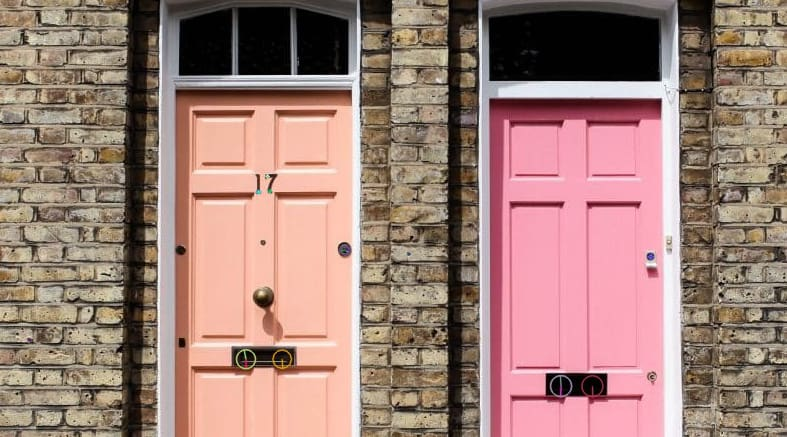

The function <code>cv2.drawKeypoints()</code> will not modify your original image, but return a new one. In the picture above, you can see the keypoints drawn as circles proportional to its “size” with a stroke indicating the orientation. There are keypoints on the number “17” on the door as well as on the mail slots. But there are indeed more. From the for loop above, you can see that some keypoints are overlapped because multiple orientation angles are found.

In showing the keypoints on the image, you used the keypoint objects returned. However, you may find the feature vectors stored in <code>descriptors</code> useful if you want to further process the keypoints, such as running a clustering algorithm. But note that you still need the list of keypoints for information, such as the coordinates, to match the feature vectors.

## Keypoint Detection using ORB in OpenCV

Since the SIFT and SURF algorithms are patented, there is an incentive to develop a free alternative that doesn’t need to be licensed. It is a product of the OpenCV developers themselves.

ORB stands for Oriented FAST and Rotated BRIEF. It is a combination of two other algorithms, FAST and BRIEF with modifications to match the performance of SIFT and SURF. You do not need to understand the algorithm details to use it, and its output is also a list of keypoint objects, as follows:

In [4]:
import cv2

# Load the image and convery to grayscale
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create(30)

# Detect key points and compute descriptors
keypoints, descriptors = orb.detectAndCompute(img, None)
for x in keypoints:
    print("({:.2f},{:.2f}) = size {:.2f} angle {:.2f}".format(
            x.pt[0], x.pt[1], x.size, x.angle))

img_kp = cv2.drawKeypoints(img, keypoints, None,
                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("Keypoints", img_kp)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1282.00,2814.00) = size 31.00 angle 190.23
(2998.00,508.00) = size 31.00 angle 256.93
(5365.00,3242.00) = size 31.00 angle 208.56
(564.00,1333.00) = size 31.00 angle 149.49
(3340.00,383.00) = size 31.00 angle 256.94
(4467.00,2728.00) = size 31.00 angle 155.78
(521.00,624.00) = size 31.00 angle 187.87
(1958.40,732.00) = size 37.20 angle 343.19
(4677.60,796.80) = size 37.20 angle 262.41
(4050.00,2361.60) = size 37.20 angle 20.52
(692.40,847.20) = size 37.20 angle 78.66
(3175.20,570.00) = size 37.20 angle 49.92
(3660.48,1389.60) = size 44.64 angle 243.19
(3600.00,1391.04) = size 44.64 angle 299.20
(3350.88,732.96) = size 44.64 angle 27.33
(1006.56,2191.68) = size 44.64 angle 91.81
(2518.56,3107.52) = size 44.64 angle 101.87
(2585.09,781.06) = size 53.57 angle 18.74
(3722.11,585.79) = size 53.57 angle 303.95
(4677.70,798.34) = size 53.57 angle 285.26
(3601.15,1391.04) = size 53.57 angle 244.02
(2583.71,781.75) = size 64.28 angle 13.82
(3722.11,584.76) = size 64.28 angle 302.43
(4678.04,79

In the above, you set the ORB to generate the top 30 keypoints when you created the detector. By default, this number will be 500.

The detector returns a list of keypoints and a numpy array of descriptors (feature vector of each keypoint) exactly as before. However, the descriptors of each keypoint are now of length-32 instead of 128.

The generated keypoints are as follows:

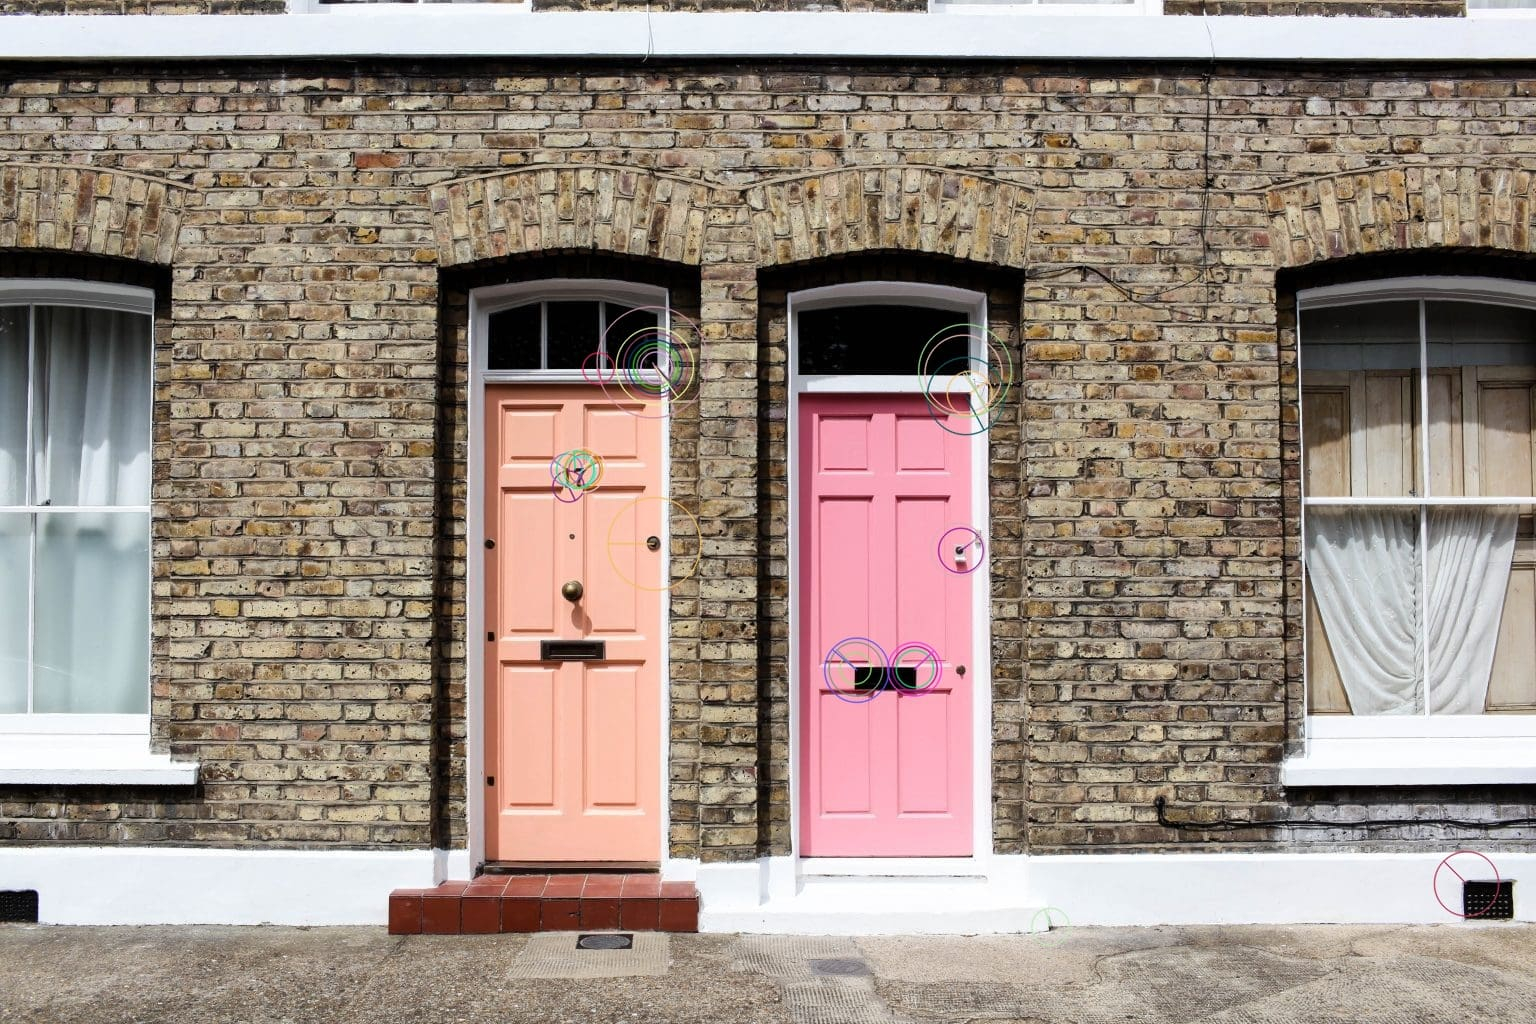

You can see, keypoints are generated roughly at the same location. The results are not exactly the same because there are overlapping keypoints (or offset by a very small distance) and easily the ORB algorithm reached the maximum count of 30. Moreover, the size are not comparable between different algorithms.

## Summary

In this tutorial, you learned how to apply OpenCV’s keypoint detection algorithms, SIFT, SURF, and ORB.

Specifically, you learned:

- What is a keypoint in an image
- How to find the keypoints and the associated description vectors using OpenCV functions.